In [2]:
import os
import gc
import pandas as pd
import numpy as np
import seaborn as sns
import h5py
import glob

import dypac
import pickle
import nibabel as nb
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn.masking import unmask
from nilearn.input_data import NiftiMasker

import warnings
warnings.filterwarnings("ignore", category=h5py.h5py_warnings.H5pyDeprecationWarning)

In [3]:
bg_path = '/mnt/amal_2TB/cneuromod/DATA/'
main_path = '/home/amal/Documents/dypac-experiments/outputs/29062020/r2_maps/'
output_folder = '/home/amal/Documents/dypac-experiments/outputs/20200728/avg_r2_maps/'

In [35]:
movie = 'hiddenfigures'
list_subject1 = ['sub-06']
list_subject2 = ['sub-06', 'sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05']

1
2
3
4
5
6
/home/amal/Documents/dypac-experiments/outputs/20200728/avg_r2_maps/figs/sub-06-average-r2-map-across-runs-hiddenfigures.png


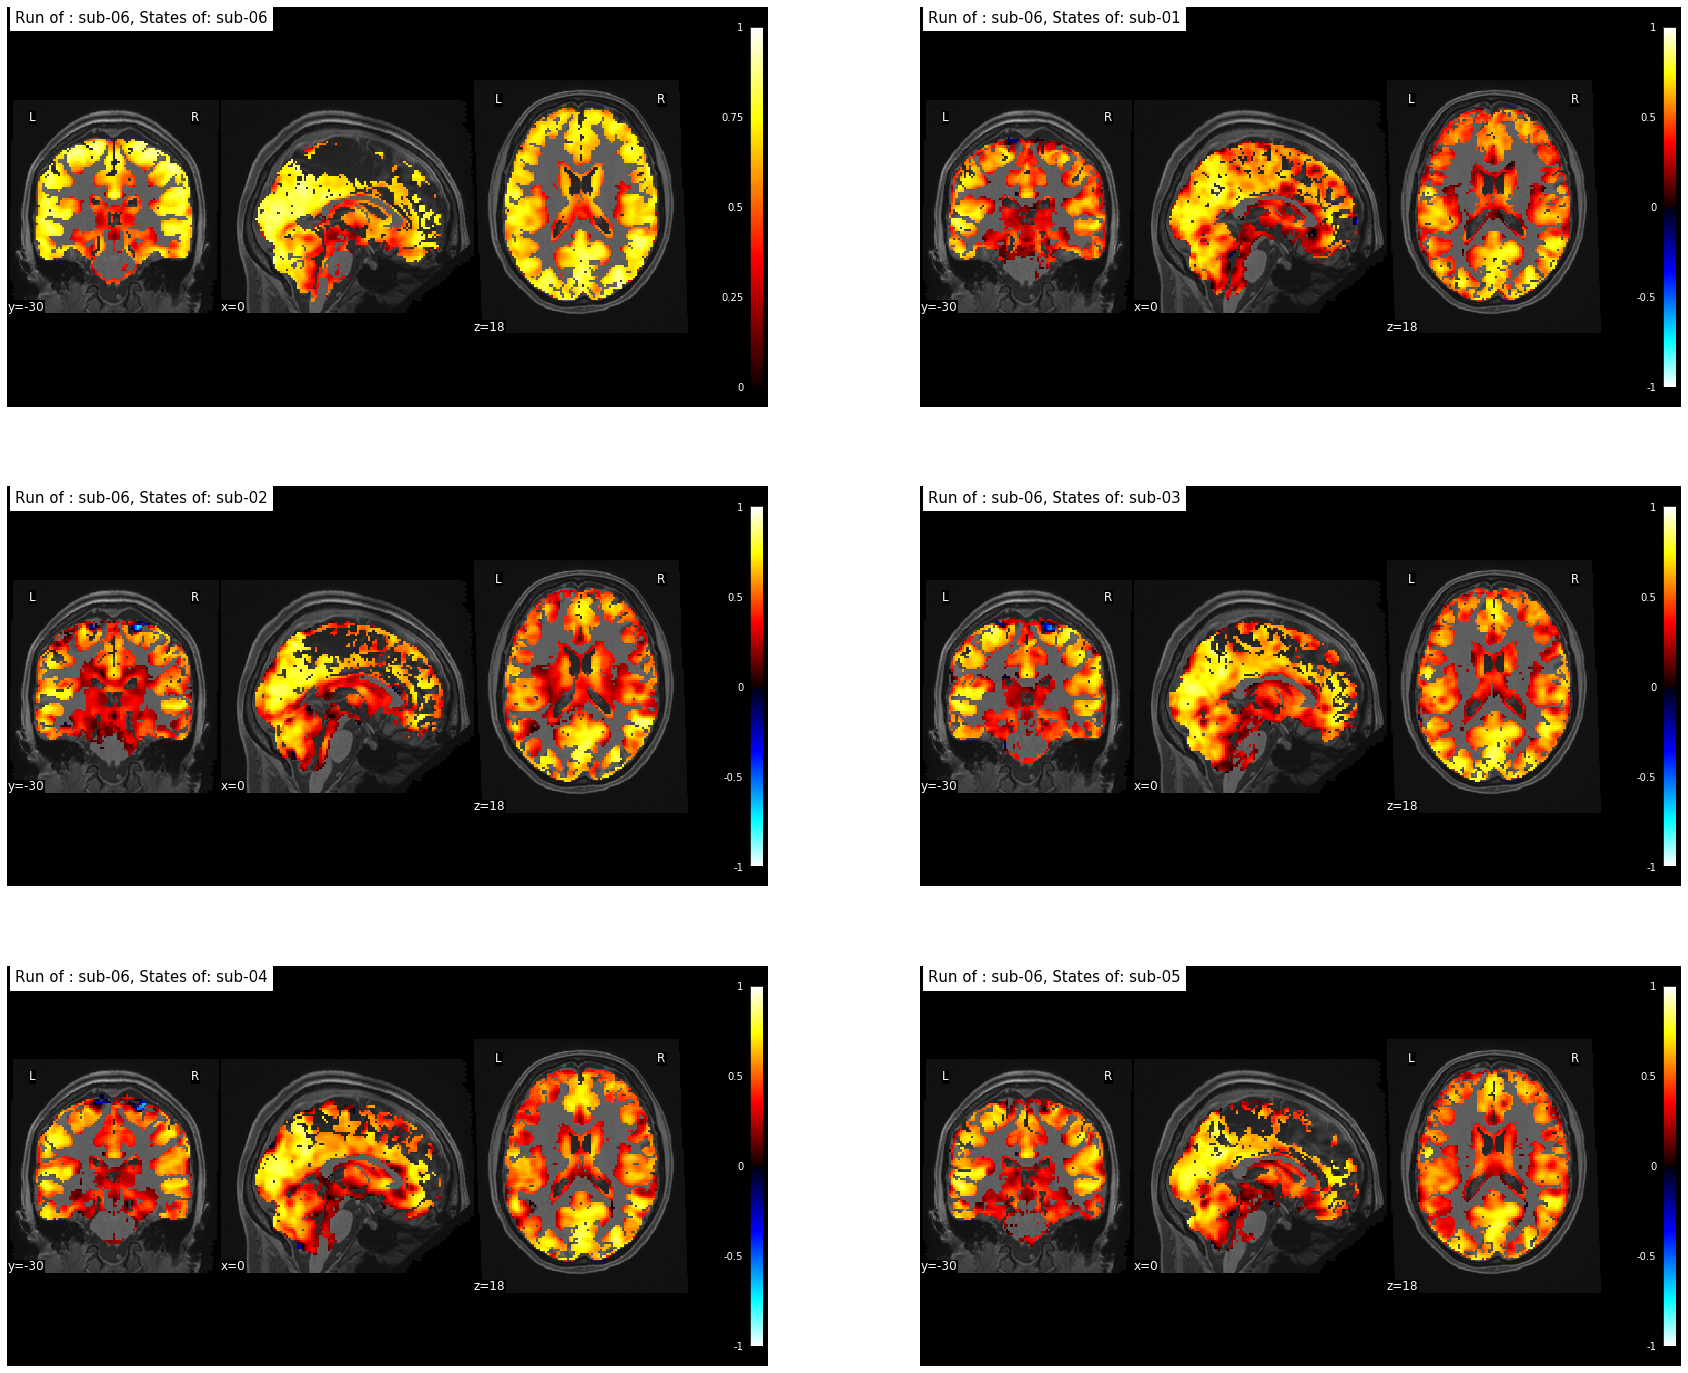

<Figure size 2160x1800 with 0 Axes>

In [36]:
width = 30

length = 25

threshold = -0.99

plt.figure(figsize=(width, length))

counter =1
for sub_ts in list_subject1:
    
    for sub_eb in list_subject2:
   
        if counter <= 6:

            bg_img = os.path.join(bg_path, sub_ts + '_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz')

            map_img = os.path.join(output_folder, sub_ts+ '-average-map-r2-'+movie+'-embedding-'+sub_eb+'.nii')

            plotting.plot_stat_map(map_img, bg_img=bg_img, display_mode='ortho', title='Run of : '+ sub_ts+ ', States of: '+ sub_eb , 
                                   figure=None, cut_coords = (0, -30, 18),
                                   annotate=True, draw_cross=False, black_bg='auto', 
                                   symmetric_cbar='auto', dim='auto', vmax=1, 
                                   resampling_interpolation='continuous', 
                                   colorbar=True, axes=plt.subplot(3, 2, counter))
            print(counter)
            counter +=1
            
            if counter > 6:
                
                fname = os.path.join('/home/amal/Documents/dypac-experiments/outputs/20200728/avg_r2_maps/', 'figs', sub_ts+ '-average-r2-map-across-runs-'+movie+'.png')      
                print(fname)
                plt.savefig(fname)
                plt.figure(figsize=(width, length))
                
        else:

            counter = 1
        